In [1]:
import pandas as pd
import numpy as np
import os

In [12]:
root_path = os.path.dirname(os.path.abspath(os.path.curdir)) # 1 up from /notebooks (curdir) to main project folder
data_folder_path = os.path.join(root_path, 'wildfire_prediction', 'data')
data_file_path = os.path.join(data_folder_path, 'FH_data.csv')

data = pd.read_csv(data_file_path)

In [13]:
data = data[['Year', 'Month', 'Day', 'Region', 'count()[unit: km^2]', 'mean() Temperature', 'max() Temperature', 'min() Temperature', 'mean() WindSpeed', 'mean() RelativeHumidity', 'mean() Precipitation', 'mean() SolarRadiation', 'Vegetation_index_variance', 'Vegetation_index_mean','Shrubs','Herbaceous vegetation', 'Cultivated and managed vegetation/agriculture (cropland)', 'Urban / built up', 'Bare / sparse vegetation','Permanent water bodies', 'Herbaceous wetland','Closed forest, evergreen, broad leaf', 'Closed forest, deciduous broad leaf', 'Closed forest, unknown', 'Open forest, evergreen broad leaf', 'Open forest, deciduous broad leaf','Open forest, unknown definitions', 'Open sea', 'target']]

In [35]:
data['mean() SolarRadiation'] = data['mean() SolarRadiation']*0.1

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40971 entries, 0 to 40970
Data columns (total 35 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Year                                                      40971 non-null  float64
 1   Month                                                     40971 non-null  float64
 2   Day                                                       40971 non-null  float64
 3   count()[unit: km^2]                                       40971 non-null  float64
 4   mean() Temperature                                        40971 non-null  float64
 5   max() Temperature                                         40971 non-null  float64
 6   min() Temperature                                         40971 non-null  float64
 7   mean() WindSpeed                                          40971 non-null  float64
 8   mean() RelativeH

## preprocessing

In [37]:
data.isnull().sum().sort_values(ascending=False)

Year                                                        0
Open sea                                                    0
Closed forest, evergreen, broad leaf                        0
Closed forest, deciduous broad leaf                         0
Closed forest, unknown                                      0
Open forest, evergreen broad leaf                           0
Open forest, deciduous broad leaf                           0
Open forest, unknown definitions                            0
target                                                      0
Permanent water bodies                                      0
NSW                                                         0
NT                                                          0
QL                                                          0
SA                                                          0
TA                                                          0
VI                                                          0
Herbaceo

In [16]:
data.Region.unique()

array(['NSW', 'NT', 'QL', 'SA', 'TA', 'VI', 'WA'], dtype=object)

In [17]:
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.impute import KNNImputer

ohe = OneHotEncoder(sparse = False)
ohe.fit(data[['Region']]) 
region_encoded = ohe.transform(data[['Region']])

data["NSW"],data["NT"],data['QL'], data['SA'], data['TA'], data['VI'], data['WA'] = region_encoded.T 
data.drop(columns = 'Region', inplace = True)
imputer = KNNImputer()
data = pd.DataFrame(imputer.fit_transform(data),columns = data.columns)

In [18]:
data.head()

,Year,Month,Day,count()[unit: km^2],mean() Temperature,max() Temperature,min() Temperature,mean() WindSpeed,mean() RelativeHumidity,mean() Precipitation,...,"Open forest, unknown definitions",Open sea,target,NSW,NT,QL,SA,TA,VI,WA
0,2005.0,1.0,1.0,8.002343e+05,27.341182,35.878704,14.485785,3.323550,36.355567,0.044274,...,10.3,0.1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2005.0,1.0,1.0,1.357561e+06,29.881492,38.136787,24.179960,5.296892,61.494675,9.884958,...,9.3,0.5,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,2005.0,1.0,1.0,1.730605e+06,28.842866,37.047943,20.951620,3.483753,47.959364,1.453053,...,11.0,0.3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,2005.0,1.0,1.0,9.913151e+05,30.793675,38.326847,14.095855,4.657538,30.057683,0.059078,...,5.3,0.6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,2005.0,1.0,1.0,6.778526e+04,11.788805,16.228510,6.686816,5.408138,65.086764,3.099497,...,7.2,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [38]:
X = data.drop(columns=['target'])
y = data.target

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [40]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train),columns = X_train.columns)
X_test = pd.DataFrame(scaler.fit_transform(X_test),columns = X_test.columns)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train),columns = X_train.columns)
X_test = pd.DataFrame(scaler.fit_transform(X_test),columns = X_test.columns)

In [41]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(max_iter = 2000)

In [42]:
log_model.fit(X_train, y_train)
result = log_model.predict(X_test)

In [43]:
np.unique(result)

array([0., 1.])

In [44]:
result.sum()

7646.0

In [45]:
y_test.sum()

7958.0

In [46]:
difference = y_test - result
unique, counts = np.unique(difference, return_counts=True)
dic = dict(zip(unique, counts))
score = (dic[-1] + dic[1])/len(y_test)
1- score

0.81500162707452

In [47]:
log_model.score(X_test, y_test)

0.8150016270745201

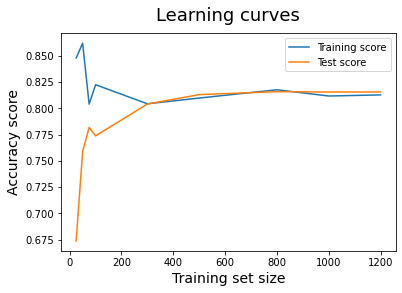

In [29]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
import numpy as np

# Get train scores, train sizes, and validation scores using `learning_curve`, r2 score
train_sizes, train_scores, test_scores = learning_curve(estimator = LogisticRegression(max_iter=2000),
                                                              X = X_train, 
                                                              y = y_train, 
                                                              train_sizes = [25,50,75,100,300,500,800, 1000, 1200], 
                                                              cv = 20)

# Take the mean of cross-validated train scores and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Plot the learning curves!
plt.plot(train_sizes, train_scores_mean, label = 'Training score')
plt.plot(train_sizes, test_scores_mean, label = 'Test score')
plt.ylabel('Accuracy score', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves', fontsize = 18, y = 1.03)
#plt.xlim([0, 1000])
#plt.ylim([0, 1])
plt.legend()

In [48]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors = 22)
knn_model.fit(X_train, y_train)
result_knn = log_model.predict(X_test)
knn_model.score(X_test, y_test)

0.8310283110966482

Text(0, 0.5, 'R2 score')

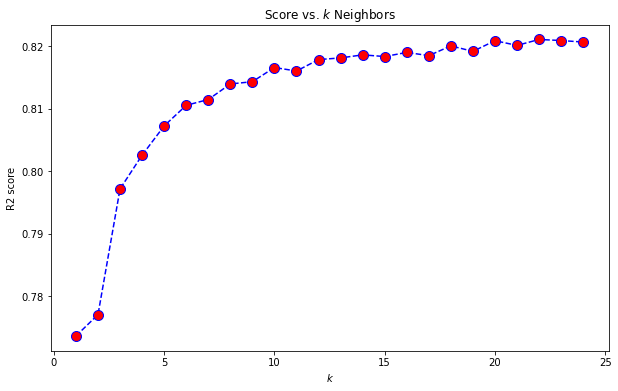

In [23]:
score = []
neighbours = []

for k in range(1,25):
    
    # Instanciate the model
    knn_model = KNeighborsClassifier(n_neighbors = k)

    # Train the model on the scaled Training data
    cv_results = cross_validate(knn_model, X,y)

    # Append the score and k
    score.append(cv_results['test_score'].mean())
    neighbours.append(k)

import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(range(1,25),score,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Score vs. $k$ Neighbors')
plt.xlabel('$k$')
plt.ylabel('R2 score')

In [49]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
result_nb = log_model.predict(X_test)
nb_model.score(X_test, y_test)

0.8061340709404491

In [32]:
from sklearn.svm import LinearSVC
svc_model = LinearSVC(max_iter = 2000, C = 0.5)
svc_model.fit(X_train, y_train)
result_svc = svc_model.predict(X_test)
svc_model.score(X_test, y_test)

/Users/felixhermes/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.8158965180605272

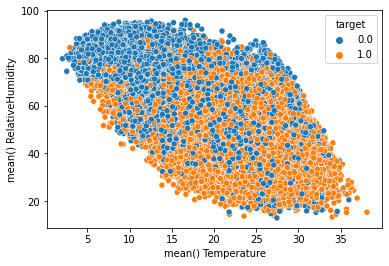

In [33]:
import seaborn as sns
sns.scatterplot(x = data['mean() Temperature'], y = data['mean() RelativeHumidity'], hue = data['target']);

In [50]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators = 140, max_depth = 35)
rf_model = rf_model.fit(X_train, y_train)
result_rf =rf_model.predict(X_test)
rf_model.score(X_test, y_test)

0.8471363488447771

## Let's do it with less features - not anymore, forget this

In [45]:
X = data[['mean() Precipitation', 'mean() RelativeHumidity', 'mean() SoilWaterContent', 'mean() SolarRadiation', 'mean() Temperature', 'mean() WindSpeed', 'Vegetation_index_mean']]
y = data.target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train),columns = X_train.columns)
X_test = pd.DataFrame(scaler.fit_transform(X_test),columns = X_test.columns)

In [47]:
log_model_reduced = LogisticRegression(max_iter = 2000)
log_model_reduced.fit(X_train, y_train)
result = log_model_reduced.predict(X_test)
log_model_reduced.score(X_test, y_test)

0.7736739342661894

<AxesSubplot:xlabel='Vegetation_index_mean', ylabel='Count'>

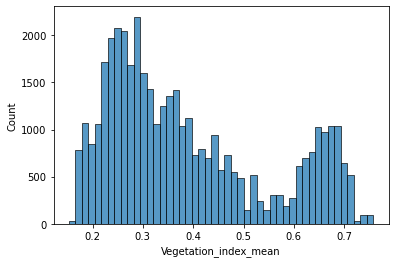

In [55]:
sns.histplot(data['Vegetation_index_mean'])

In [52]:
data.to_csv('/Users/felixhermes/code/miguelferreira13/wildfire_prediction/wildfire_prediction/data/FH_data_final.csv', index = 0)